# pascal's triangle mod n

Everybody loves Pascal's Triangle, right? The pyramid of numbers where you start with one, and each number after is the sum of the two above it?

```
            1
           1 1
          1 2 1
         1 3 3 1
        1 4 6 ...
```

One of my favorite facts about it is that if you create it *modulo 2*, the triangle of 0's and 1's begins to resemble the famous [Sierpiński Triangle!](http://larryriddle.agnesscott.org/ifs/siertri/Pascal.htm)

As a huge fan of triangles, this fact has always amused me. Recently though, I was sitting in class and I wondered, if this cool thing happens when we take it mod 2, what happens when we try other divisors? And what patterns could emerge when we look at the various remainders in a neat little visualization? Let's find out!

In [32]:
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon

In [224]:
def generate_pascal(n:int, k:int=None)->list[list[int]]:
    # return pascal triangle with n rows
    # and if provided, modulo k
    width = 1
    tri = [] # list of lists should work fine for our purposes
    for i in range(n):
        row = []
        for j in range(width):
            if j == 0 or j == width-1: # if first or last in row, make 1
                num = 1
            else: # otherwise sum of above and above left 
                num = tri[i-1][j-1] + tri[i-1][j]
                if k:
                    num = num%k
            row.append(num)
        tri.append(row)
        width += 1
    return tri

In [225]:
for r in generate_pascal(25,3):
    print(r) 

[1]
[1, 1]
[1, 2, 1]
[1, 0, 0, 1]
[1, 1, 0, 1, 1]
[1, 2, 1, 1, 2, 1]
[1, 0, 0, 2, 0, 0, 1]
[1, 1, 0, 2, 2, 0, 1, 1]
[1, 2, 1, 2, 1, 2, 1, 2, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
[1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1]
[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1]
[1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1]
[1, 2, 1, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 2, 1]
[1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1]
[1, 1, 0, 2, 2, 0, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1]
[1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1]
[1, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1]
[1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1]
[1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1]
[1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 2, 1, 1, 2, 1]
[1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1]


You can already see a sort of pattern emerging!

Now we just need some way to visualize this. I thought a triangle made of hexagonal cells would look good, so I tried to make something simple with matplotlib.

In [227]:
# source for matplotlib lines: https://stackoverflow.com/questions/59042139/how-to-properly-draw-hexagons-with-offset-coordinates
def draw_triangle(n):
    rt13 = np.sqrt(1/3)
    rt34 = np.sqrt(3/4)
    
    offCoord = []
    for i in range(n):
        x = -0.5*(i+1)
        y = -rt34*i
        for j in range(i+1):
            coord = [x,y]
            offCoord.append(coord)
            x+=1
    
    fig, ax = plt.subplots(1,figsize=(9,9))
    ax.set_aspect('equal')

    for c in offCoord:
        hexagon = RegularPolygon((c[0], c[1]), numVertices=6, radius=rt13, alpha=0.2, edgecolor='k')
        ax.add_patch(hexagon)
    plt.autoscale(enable = True)
    plt.show()

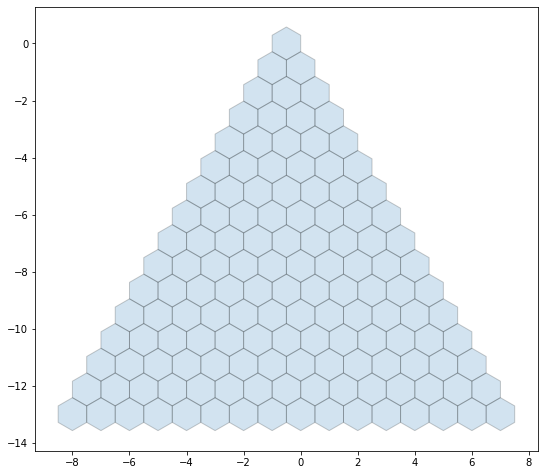

In [229]:
draw_triangle(16)

This looks good, but I want to actually use values from pascal's triangle to color the cells, so I wrote this function to do just that!

I made the decision to color the cells on a gradient from white to black. If a cell represents a number exactly divisible by k, it will be colored white, and if it is exactly one less than being divisible by k (i.e. the maximum value is could take mod k) it will be colored black.

I also came back later and wanted to have the option to specifically highlight cells of certain values so I added an optional argument `highlight`

In [194]:
def draw_pascal(triangle,k,highlight=False):
    n = len(triangle)
    rt13 = np.sqrt(1/3)
    rt34 = np.sqrt(3/4)
    
    fig, ax = plt.subplots(1,figsize=(9,9))
    ax.set_aspect('equal')

    for i in range(n):
        x = -0.5*(i+1)
        y = -rt34*i
        for j in range(i+1):
            r = triangle[i][j]/(k-1)
            if highlight and r == 0.0:
                f = (1,0,0)
            else:
                f = (1-r,1-r,1-r)
            hexagon = RegularPolygon((x,y), numVertices=6, radius=rt13, alpha=0.9, facecolor=f, edgecolor=f)
            ax.add_patch(hexagon)
            x+=1
    
    plt.autoscale(enable = True)
    plt.show()

Cool, now we can do the fun stuff!

First, I tested it with the original fun fact about mod 2

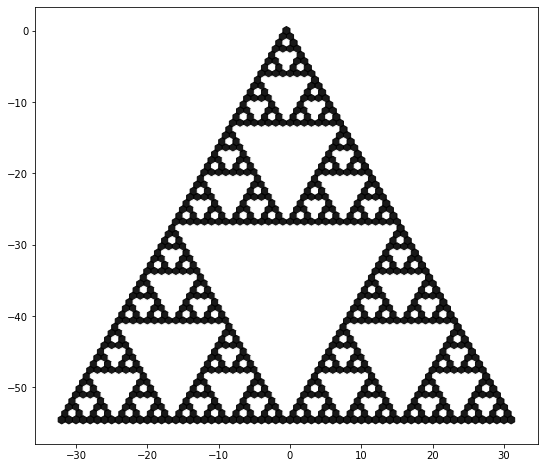

In [195]:
k = 2
tri = generate_pascal(64,k)
draw_pascal(tri,k)

See isn't that cool??

Then mod 3... 

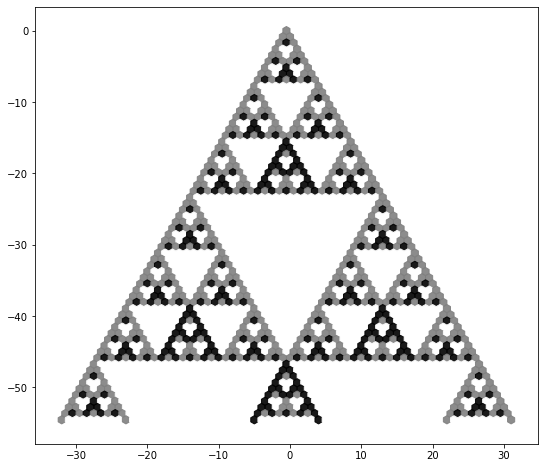

In [197]:
k = 3
tri = generate_pascal(64,k)
draw_pascal(tri,k)

Already a totally different pattern, surprise surprise!

After this I just started playing around with different values. I think the results look pretty cool, especially when you think about how all the white patches represent hundreds of numbers exactly 0 mod k! 

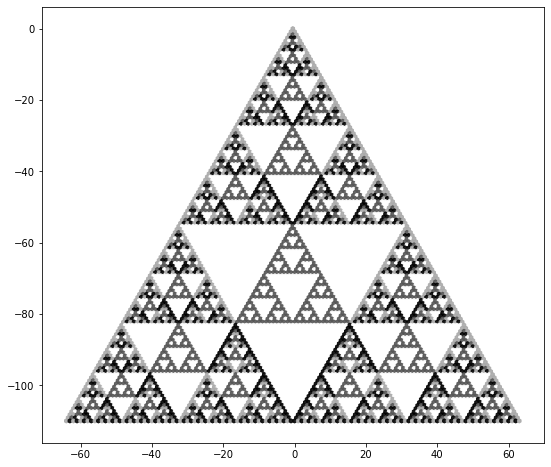

In [185]:
k = 4
tri = generate_pascal(128,k)
draw_pascal(tri,k)

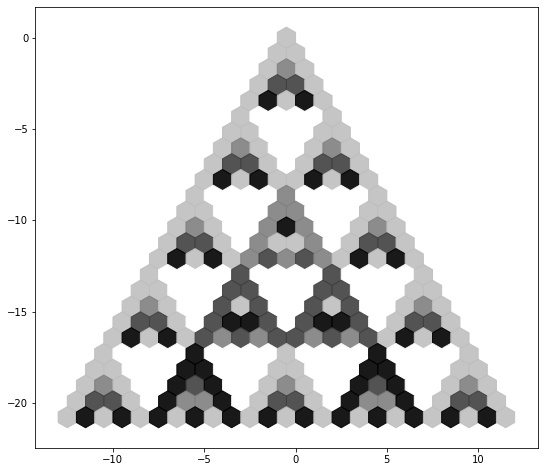

In [151]:
k = 5
tri = generate_pascal(25,k)
draw_pascal(tri,k)

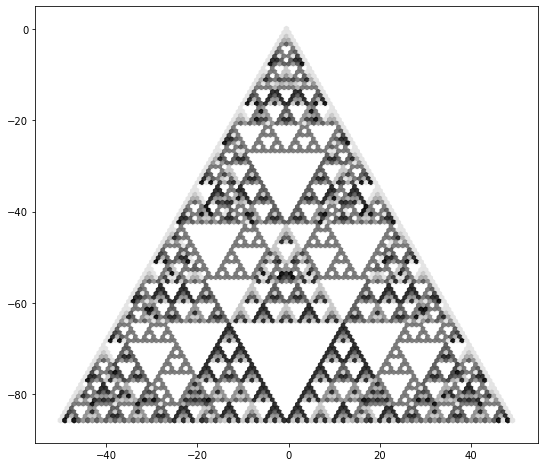

In [153]:
k = 10
tri = generate_pascal(100,k)
draw_pascal(tri,k)

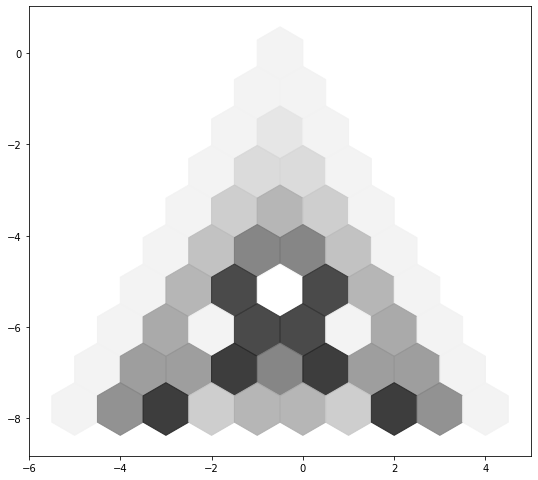

In [176]:
k = 20
tri = generate_pascal(10,k)
draw_pascal(tri,k)

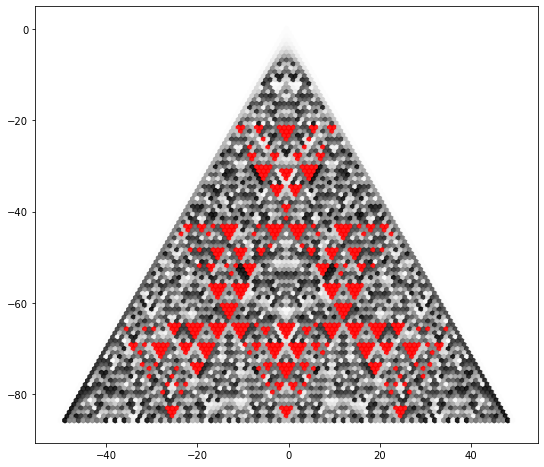

In [218]:
k = 100
tri = generate_pascal(100,k)
draw_pascal(tri,k,highlight=True) # here, the red cells highlight cells exactly 0 mod 100

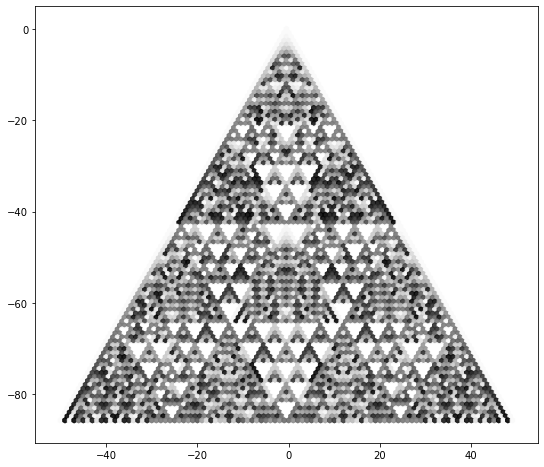

In [200]:
k = 50
tri = generate_pascal(100,k)
draw_pascal(tri,k)

The results for *prime* values of k are my favorites!

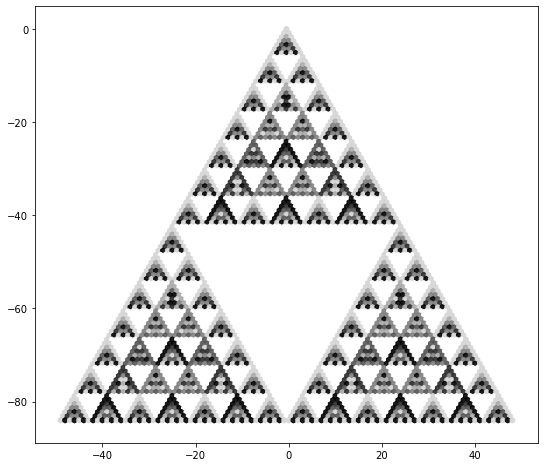

In [220]:
k = 7
tri = generate_pascal(98,k)
draw_pascal(tri,k)

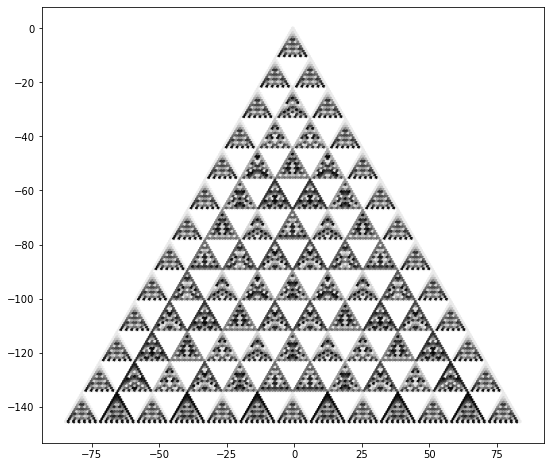

In [226]:
k = 13
tri = generate_pascal(169,k)
draw_pascal(tri,k)

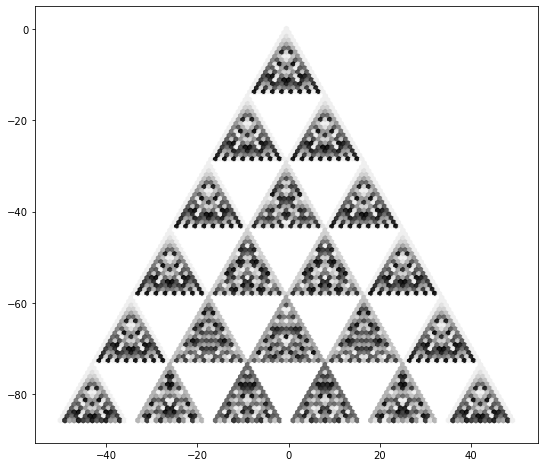

In [203]:
k = 17
tri = generate_pascal(100,k)
draw_pascal(tri,k)

But the composite numbers look really striking as well.

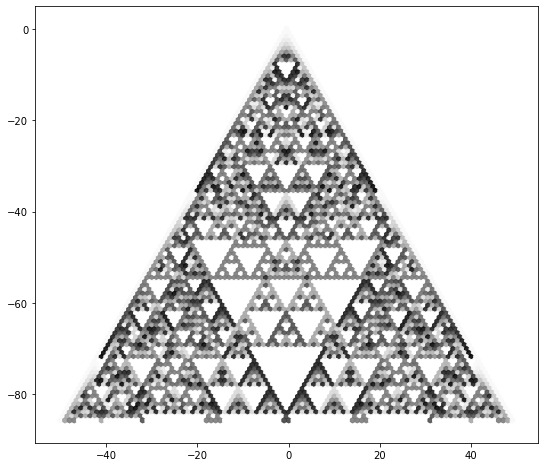

In [233]:
k = 42
tri = generate_pascal(100,k)
draw_pascal(tri,k)

In [235]:
import time

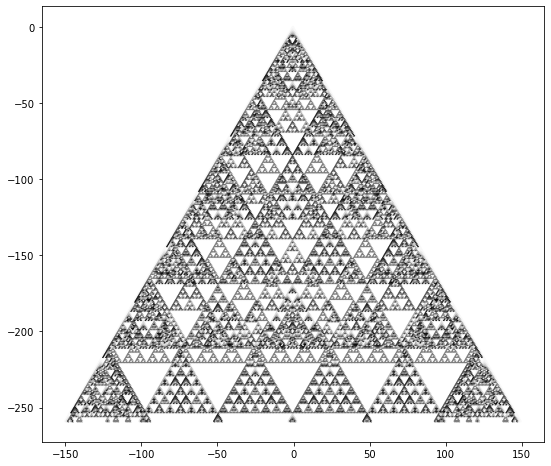

64.30926823616028


In [251]:
t=time.time()
k = 42
tri = generate_pascal(300,k)
draw_pascal(tri,k)
print(time.time()-t)

I recommend running this for yourself and seeing what values have cool results. 

If you know something about matplotlib that will make my code faster, or have any idea why the prime values for k look like they do, let me know!

Thanks for reading this, have a great day!

Jeremiah Crowell